In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

           Unnamed: 0      open      high     low     close  volume  \
0 2017-12-20 14:30:00  118.6600  118.7100  118.66  118.7000   43248   
1 2017-12-20 14:45:00  118.9500  119.1200  117.56  117.8200   69261   
2 2017-12-20 15:00:00  117.8200  118.3200  117.77  118.2300  163492   
3 2017-12-20 15:15:00  118.2200  118.4200  118.09  118.1800   49993   
4 2017-12-20 15:30:00  118.1800  118.2452  118.06  118.2400   40796   
5 2017-12-20 15:45:00  118.2400  118.2500  118.00  118.1000   43877   
6 2017-12-20 16:00:00  118.1300  118.2400  118.05  118.1200   41672   
7 2017-12-20 16:15:00  118.1101  118.2100  118.06  118.0600   32619   
8 2017-12-20 16:30:00  118.0874  118.1400  117.92  118.0899   28223   
9 2017-12-20 16:45:00  118.0900  118.0900  117.93  118.0500   31569   

   close_2_sma  close_4_sma  close_6_sma  close_8_sma    ...          rs_8  \
0    118.70000   118.700000   118.700000   118.700000    ...           NaN   
1    118.26000   118.260000   118.260000   118.260000    ...  

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
def expercentage(y,prediction,percentage,t):
    tot=0
    falsetotpos=0
    falsetotneg=0
    for i in range(0,len(percentage)-1):
        if(prediction[i]==1):
            tot=tot+percentage[i]
        if(prediction[i]==0):
            tot=tot-percentage[i]
            
        falsetotpos=falsetotpos+percentage[i]
        falsetotneg=falsetotneg-percentage[i]
        i=i+t
    return tot,falsetotneg, falsetotpos

Working on... AAPL
40
34
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.5556458164094233
G-score: 0.5109213147295165
Accuracy 0.515929203539823
Window: 140
[[241 265]
 [282 342]]
Vol pos 2.889393778798231
Vol neg 3.4775536545935997


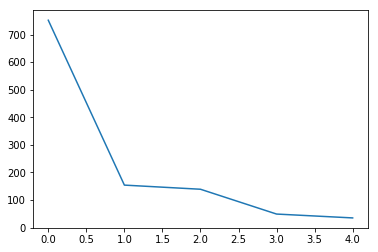

Real Percentage of gain: 37.966371847674615
Percentage of gain: -0.1926595363038321
Total gain: -217.70527602333027
000000000000000000000000000000000000000000000000
Percentile:  0
[[199 179]
 [166 209]]
0.5418326693227091
Percentile:  1
[[34 34]
 [40 44]]
0.5131578947368421
Percentile:  2
[[ 8 52]
 [34 45]]
0.381294964028777
Percentile:  3
[[ 0  0]
 [25 24]]
0.4897959183673469
Percentile:  4
[[ 0  0]
 [17 18]]
0.5142857142857142
000000000000000000000000000000000000000000000000
Working on... AMZN
40
34
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.5684830633284241
G-score: 0.5284803314389808
Accuracy 0.4823321554770318
Window: 140
[[160  91]
 [495 386]]
Vol pos 2.153882622922845
Vol neg 2.5577317352969495


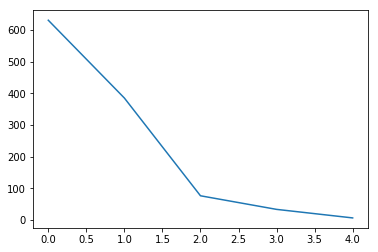

Real Percentage of gain: 13.410730572983574
Percentage of gain: -0.2851686261202641
Total gain: -322.810884768139
000000000000000000000000000000000000000000000000
Percentile:  0
[[137  62]
 [244 187]]
0.5142857142857142
Percentile:  1
[[ 11  25]
 [187 162]]
0.44935064935064933
Percentile:  2
[[12  4]
 [25 35]]
0.618421052631579
Percentile:  3
[[ 0  0]
 [31  2]]
0.06060606060606061
Percentile:  4
[[0 0]
 [6 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PEP
40
30
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.5800756620428752
G-score: 0.6302176245687766
Accuracy 0.48847926267281105
Window: 140
[[ 88   3]
 [330 230]]
Vol pos 2.444116775430223
Vol neg 1.736945188840793


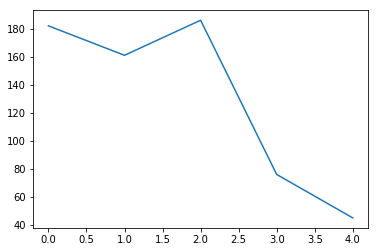

Real Percentage of gain: 10.564870394480986
Percentage of gain: 0.30541687665564804
Total gain: 198.82638670282688
000000000000000000000000000000000000000000000000
Percentile:  0
[[69  3]
 [92 18]]
0.47802197802197804
Percentile:  1
[[ 19   0]
 [111  31]]
0.3105590062111801
Percentile:  2
[[  0   0]
 [113  73]]
0.3924731182795699
Percentile:  3
[[ 0  0]
 [13 63]]
0.8289473684210527
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
40
34
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.5122918318794608
G-score: 0.4493598757391429
Accuracy 0.4557522123893805
Window: 140
[[192 263]
 [352 323]]
Vol pos 2.7722036632342486
Vol neg 3.108610407988293


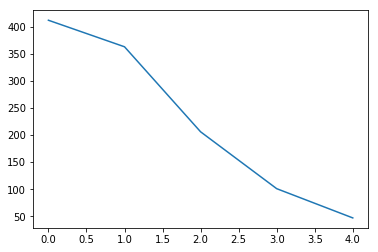

Real Percentage of gain: -38.12634309299584
Percentage of gain: -0.4284163843780197
Total gain: -484.1105143471623
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 98 134]
 [ 74 105]]
0.49391727493917276
Percentile:  1
[[ 44  67]
 [119 133]]
0.48760330578512395
Percentile:  2
[[48 49]
 [83 26]]
0.3592233009708738
Percentile:  3
[[ 1 13]
 [60 27]]
0.27722772277227725
Percentile:  4
[[ 0  0]
 [15 32]]
0.6808510638297872
000000000000000000000000000000000000000000000000
Working on... MSFT
40
34
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.5322085889570553
G-score: 0.4488962497048028
Accuracy 0.46017699115044247
Window: 140
[[173 246]
 [364 347]]
Vol pos 1.3246676708875724
Vol neg 1.7886020731811776


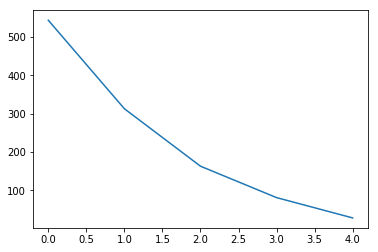

Real Percentage of gain: 0.6206135871562424
Percentage of gain: -0.355946969715912
Total gain: -402.2200757789806
000000000000000000000000000000000000000000000000
Percentile:  0
[[122 170]
 [ 83 169]]
0.5349264705882353
Percentile:  1
[[ 36  38]
 [125 114]]
0.4792332268370607
Percentile:  2
[[ 9 14]
 [99 41]]
0.3067484662576687
Percentile:  3
[[ 4 16]
 [46 15]]
0.2345679012345679
Percentile:  4
[[ 2  8]
 [11  7]]
0.32142857142857145
000000000000000000000000000000000000000000000000
Working on... FB
40
33
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.7366482504604052
G-score: 0.5200037494256653
Accuracy 0.6210247349823321
Window: 140
[[103 160]
 [269 600]]
Vol pos 3.2125506265545427
Vol neg 2.8566412799792062


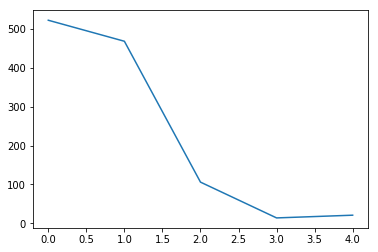

Real Percentage of gain: 101.2829737253503
Percentage of gain: 0.9124770153328304
Total gain: 1032.923981356764
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64 148]
 [ 90 220]]
0.5440613026819924
Percentile:  1
[[ 25  12]
 [122 309]]
0.7136752136752137
Percentile:  2
[[13  0]
 [41 51]]
0.6095238095238096
Percentile:  3
[[0 0]
 [7 7]]
0.5
Percentile:  4
[[ 0  0]
 [ 8 13]]
0.6190476190476191
000000000000000000000000000000000000000000000000
Working on... INTC
40
34
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.6073223259152907
G-score: 0.4728905475105334
Accuracy 0.5167844522968198
Window: 140
[[162 286]
 [261 423]]
Vol pos 2.3250034692772923
Vol neg 2.33612453719611


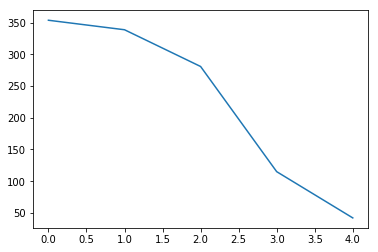

Real Percentage of gain: 39.41840467915763
Percentage of gain: 0.07267394671461451
Total gain: 82.26690768094363
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 23  93]
 [ 78 160]]
0.5169491525423728
Percentile:  1
[[ 41  73]
 [ 96 132]]
0.5058479532163743
Percentile:  2
[[53 74]
 [54 97]]
0.539568345323741
Percentile:  3
[[32 31]
 [23 28]]
0.5263157894736842
Percentile:  4
[[13 15]
 [ 9  5]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... CSCO
40
32
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.4370731707317073
G-score: 0.4845625228744207
Accuracy 0.4871111111111111
Window: 140
[[324 153]
 [424 224]]
Vol pos 2.0570237443716684
Vol neg 1.6370312032151968


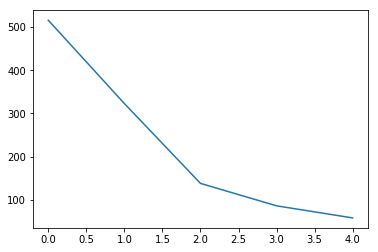

Real Percentage of gain: 39.016408902300974
Percentage of gain: 0.16238400680933854
Total gain: 182.68200766050586
000000000000000000000000000000000000000000000000
Percentile:  0
[[162  58]
 [212  84]]
0.47674418604651164
Percentile:  1
[[ 57  39]
 [141  86]]
0.44272445820433437
Percentile:  2
[[11 39]
 [53 35]]
0.3333333333333333
Percentile:  3
[[41 17]
 [ 9 19]]
0.6976744186046512
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
40
33
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.4959276018099547
G-score: 0.5079264112440298
Accuracy 0.5079505300353356
Window: 140
[[301 239]
 [318 274]]
Vol pos 2.8588507221447226
Vol neg 2.854978396739082


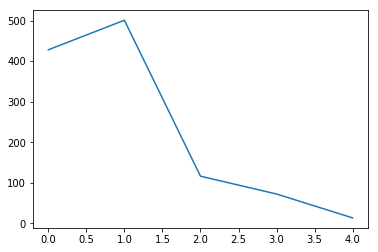

Real Percentage of gain: 46.407737667194084
Percentage of gain: 0.047364132729281486
Total gain: 53.61619824954664
000000000000000000000000000000000000000000000000
Percentile:  0
[[116 111]
 [ 77 124]]
0.5607476635514018
Percentile:  1
[[112  85]
 [195 109]]
0.4411177644710579
Percentile:  2
[[22 20]
 [38 36]]
0.5
Percentile:  3
[[44 16]
 [ 8  4]]
0.6666666666666666
Percentile:  4
[[7 6]
 [0 0]]
0.5384615384615384
000000000000000000000000000000000000000000000000
Working on... NVDA
40
33
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.7143933685003767
G-score: 0.6507825157169338
Accuracy 0.6651943462897526
Window: 140
[[279 197]
 [182 474]]
Vol pos 3.8253199710453005
Vol neg 3.6593782894720737


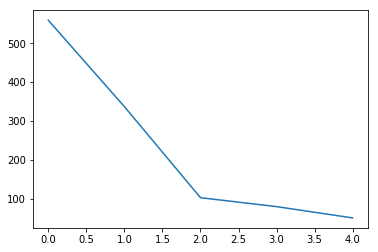

Real Percentage of gain: 410.581785559612
Percentage of gain: 1.31940067710883
Total gain: 1493.5615664871955
000000000000000000000000000000000000000000000000
Percentile:  0
[[201 112]
 [ 79 167]]
0.6583184257602862
Percentile:  1
[[ 68  49]
 [ 61 159]]
0.6735905044510386
Percentile:  2
[[10 21]
 [ 5 67]]
0.7475728155339806
Percentile:  3
[[ 0 15]
 [18 47]]
0.5875
Percentile:  4
[[ 0  0]
 [18 33]]
0.6470588235294118
000000000000000000000000000000000000000000000000
Working on... NFLX
40
34
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.6903485254691689
G-score: 0.5673460051380992
Accuracy 0.5918727915194346
Window: 140
[[155 142]
 [320 515]]
Vol pos 4.417834511733909
Vol neg 4.218953183774137


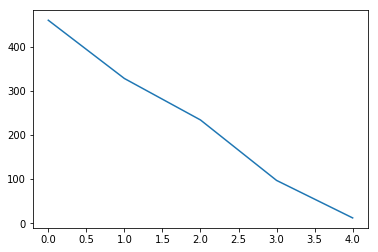

Real Percentage of gain: 167.4378527660552
Percentage of gain: 0.8929264593269146
Total gain: 1010.7927519580674
000000000000000000000000000000000000000000000000
Percentile:  0
[[107  63]
 [ 87 203]]
0.6739130434782609
Percentile:  1
[[  8  52]
 [137 131]]
0.42378048780487804
Percentile:  2
[[ 13  25]
 [ 82 113]]
0.5407725321888412
Percentile:  3
[[25  2]
 [14 56]]
0.8350515463917526
Percentile:  4
[[ 1  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
40
28
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.739903069466882
G-score: 0.22886082341891342
Accuracy 0.5954773869346733
Window: 140
[[  8 123]
 [ 38 229]]
Vol pos 1.4813033702947795
Vol neg 0.738956539075863


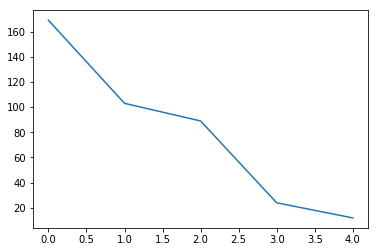

Real Percentage of gain: 199.89505006887012
Percentage of gain: 0.583158030071982
Total gain: 232.09689596864882
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 7 90]
 [22 53]]
0.3488372093023256
Percentile:  1
[[ 0 26]
 [ 4 70]]
0.7
Percentile:  2
[[ 0  7]
 [ 9 73]]
0.8202247191011236
Percentile:  3
[[ 0  0]
 [ 3 20]]
0.8695652173913043
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
40
32
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.28169014084507044
G-score: 0.29179694450434374
Accuracy 0.27723649247121346
Window: 140
[[153 235]
 [581 160]]
Vol pos 1.5808343659356083
Vol neg 2.9956285357779286


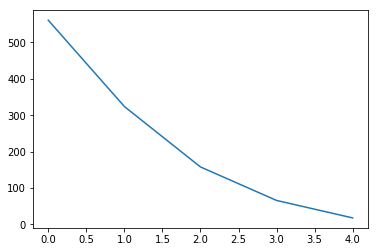

Real Percentage of gain: -263.88000452585686
Percentage of gain: -1.726866012982236
Total gain: -1949.6317286569442
000000000000000000000000000000000000000000000000
Percentile:  0
[[137 140]
 [193  91]]
0.40641711229946526
Percentile:  1
[[ 16  47]
 [213  48]]
0.19753086419753085
Percentile:  2
[[  0  25]
 [112  21]]
0.13291139240506328
Percentile:  3
[[ 0 23]
 [43  0]]
0.0
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
40
32
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.6445824706694272
G-score: 0.5062152621724171
Accuracy 0.5414069456812111
Window: 140
[[141 179]
 [336 467]]
Vol pos 2.1590042449954283
Vol neg 1.6623593681836715


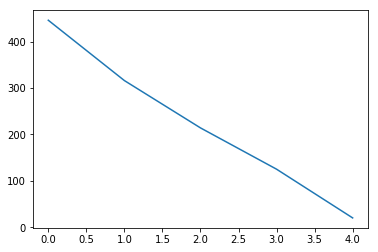

Real Percentage of gain: 71.11578819150424
Percentage of gain: 0.4065534339649417
Total gain: 456.55950634262956
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 45 120]
 [138 143]]
0.42152466367713004
Percentile:  1
[[ 21  34]
 [ 91 170]]
0.6044303797468354
Percentile:  2
[[ 19   7]
 [ 74 114]]
0.6214953271028038
Percentile:  3
[[40 16]
 [29 40]]
0.64
Percentile:  4
[[15  2]
 [ 3  0]]
0.75
000000000000000000000000000000000000000000000000
Working on... TXN
40
30
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.696584058941728
G-score: 0.540933697864362
Accuracy 0.5994694960212201
Window: 140
[[158 210]
 [243 520]]
Vol pos 2.7070074291059565
Vol neg 2.1797988212524664


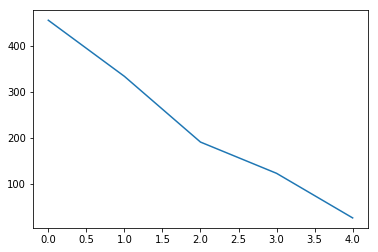

Real Percentage of gain: 96.7396955703781
Percentage of gain: 0.749692458803246
Total gain: 847.9021709064712
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 81 127]
 [ 89 158]]
0.5252747252747253
Percentile:  1
[[ 77  52]
 [ 72 133]]
0.6287425149700598
Percentile:  2
[[  0  14]
 [ 63 115]]
0.5989583333333334
Percentile:  3
[[ 0 10]
 [18 94]]
0.7704918032786885
Percentile:  4
[[ 0  7]
 [ 0 19]]
0.7307692307692307
000000000000000000000000000000000000000000000000
Working on... AVGO
40
33
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.5368098159509203
G-score: 0.45480625042895023
Accuracy 0.4640638864241349
Window: 140
[[173 233]
 [371 350]]
Vol pos 3.4572640253830866
Vol neg 2.980834530411267


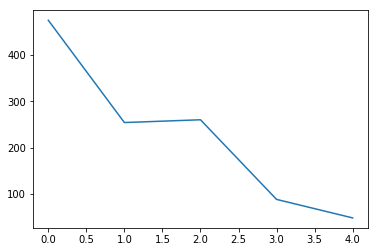

Real Percentage of gain: 11.351621328404347
Percentage of gain: 0.0068545065722707115
Total gain: 7.725028906949092
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76 125]
 [140 134]]
0.4421052631578947
Percentile:  1
[[27 77]
 [64 86]]
0.4448818897637795
Percentile:  2
[[ 21  17]
 [126  96]]
0.45
Percentile:  3
[[16  9]
 [41 22]]
0.4318181818181818
Percentile:  4
[[32  5]
 [ 0 11]]
0.8958333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
40
33
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5599435825105783
G-score: 0.40773983611752457
Accuracy 0.44729849424269263
Window: 140
[[108 210]
 [414 397]]
Vol pos 2.52141361428695
Vol neg 3.2242865323272496


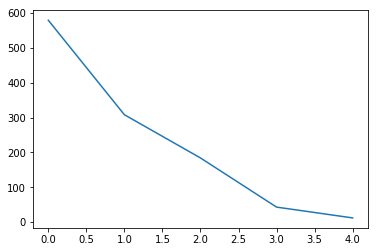

Real Percentage of gain: -39.736840306261875
Percentage of gain: -0.6542435083766996
Total gain: -738.6409209572939
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 53  81]
 [212 233]]
0.4939550949913644
Percentile:  1
[[ 15  36]
 [129 128]]
0.4642857142857143
Percentile:  2
[[39 81]
 [41 23]]
0.33695652173913043
Percentile:  3
[[ 1 12]
 [24  6]]
0.16279069767441862
Percentile:  4
[[0 0]
 [6 6]]
0.5
000000000000000000000000000000000000000000000000
Working on... GILD
40
33
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.45793397231096905
G-score: 0.5228198869260583
Accuracy 0.5487588652482269
Window: 140
[[404 178]
 [331 215]]
Vol pos 3.413478957885121
Vol neg 3.0265336312123234


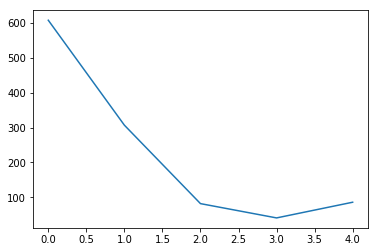

Real Percentage of gain: 162.3427017225747
Percentage of gain: 0.5074803693650862
Total gain: 572.4378566438172
000000000000000000000000000000000000000000000000
Percentile:  0
[[248  91]
 [172  97]]
0.5674342105263158
Percentile:  1
[[ 58  45]
 [120  84]]
0.46254071661237783
Percentile:  2
[[ 7  5]
 [36 34]]
0.5
Percentile:  3
[[29 12]
 [ 0  0]]
0.7073170731707317
Percentile:  4
[[62 24]
 [ 0  0]]
0.7209302325581395
000000000000000000000000000000000000000000000000
Working on... COST
40
33
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.5958062183658713
G-score: 0.47432781171391336
Accuracy 0.5039929015084295
Window: 140
[[156 229]
 [330 412]]
Vol pos 1.536979791736932
Vol neg 1.2360665431289546


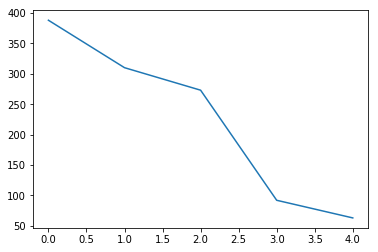

Real Percentage of gain: 50.753526411518585
Percentage of gain: 0.16152912519741952
Total gain: 182.0433240974918
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67 133]
 [ 88  99]]
0.4289405684754522
Percentile:  1
[[ 38  66]
 [103 103]]
0.45483870967741935
Percentile:  2
[[ 41  27]
 [ 91 114]]
0.5677655677655677
Percentile:  3
[[ 9  3]
 [21 59]]
0.7391304347826086
Percentile:  4
[[ 0  0]
 [26 37]]
0.5873015873015873
000000000000000000000000000000000000000000000000
Working on... QCOM
40
33
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.4779350541215654
G-score: 0.4754729100233893
Accuracy 0.44562334217506633
Window: 140
[[217 138]
 [489 287]]
Vol pos 3.33690609724966
Vol neg 3.3637299085953014


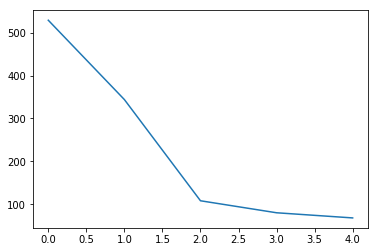

Real Percentage of gain: -21.836040914560797
Percentage of gain: -0.37777009697208247
Total gain: -427.2579796754253
000000000000000000000000000000000000000000000000
Percentile:  0
[[134  96]
 [150 149]]
0.5349716446124764
Percentile:  1
[[ 23  25]
 [230  66]]
0.25872093023255816
Percentile:  2
[[17  1]
 [60 30]]
0.4351851851851852
Percentile:  3
[[12  0]
 [30 38]]
0.625
Percentile:  4
[[31 15]
 [19  3]]
0.5
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5107967801085571
Mean gain over portfolio :  90.55286013772907
Real mean gain over portfolio 54.76634520777702


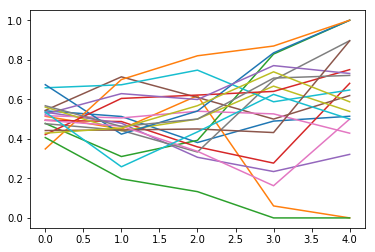

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(senttemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    senttemp=scaler.transform(senttemp)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        rf = RandomForestClassifier()
        rf.fit(x, y)
        
       
        
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        
        treshold=0.9
        optimum=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimum=order[0:u]
                break
        
        print(len(x[0]))
        
        x=x[:,optimum]
        
        print(len(x[0]))
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

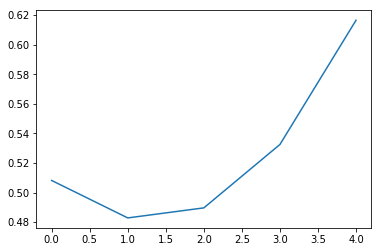

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
40
29
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.4761904761904762
G-score: 0.476930555360702
Accuracy 0.4743362831858407
Window: 140
[[266 240]
 [354 270]]
Vol pos 2.5155198188951635
Vol neg 3.7683835002933646


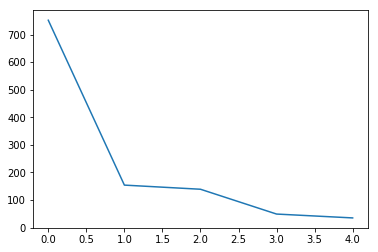

Real Percentage of gain: -14.92849546870898
Percentage of gain: -0.7877001559703105
Total gain: -890.1011762464509
000000000000000000000000000000000000000000000000
Percentile:  0
[[211 167]
 [192 183]]
0.5232403718459495
Percentile:  1
[[30 38]
 [56 28]]
0.3815789473684211
Percentile:  2
[[25 35]
 [33 46]]
0.5107913669064749
Percentile:  3
[[ 0  0]
 [38 11]]
0.22448979591836735
Percentile:  4
[[ 0  0]
 [34  1]]
0.02857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
40
29
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.658808120497708
G-score: 0.4956453719299929
Accuracy 0.5397526501766784
Window: 140
[[108 143]
 [378 503]]
Vol pos 2.2502585049588086
Vol neg 2.4950916746066296


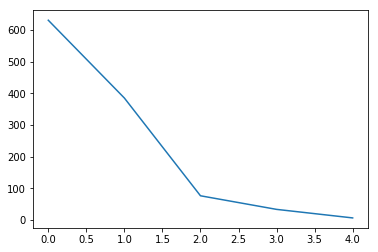

Real Percentage of gain: 55.07574931124488
Percentage of gain: 0.06622366083019261
Total gain: 74.96518405977804
000000000000000000000000000000000000000000000000
Percentile:  0
[[104  95]
 [190 241]]
0.5476190476190477
Percentile:  1
[[  2  34]
 [139 210]]
0.5506493506493506
Percentile:  2
[[ 2 14]
 [13 47]]
0.6447368421052632
Percentile:  3
[[ 0  0]
 [29  4]]
0.12121212121212122
Percentile:  4
[[0 0]
 [6 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PEP
40
24
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.5652724968314322
G-score: 0.6098839223525351
Accuracy 0.4731182795698925
Window: 140
[[ 85   6]
 [337 223]]
Vol pos 2.5306572170363317
Vol neg 1.6798526519638617


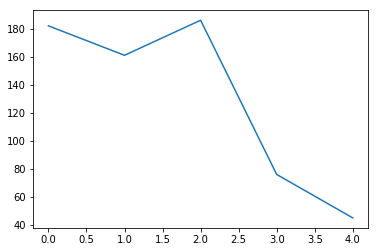

Real Percentage of gain: 3.668030638643229
Percentage of gain: 0.31221653336956323
Total gain: 203.25296322358565
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 66   6]
 [102   8]]
0.4065934065934066
Percentile:  1
[[ 19   0]
 [110  32]]
0.3167701863354037
Percentile:  2
[[  0   0]
 [111  75]]
0.4032258064516129
Percentile:  3
[[ 0  0]
 [13 63]]
0.8289473684210527
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
40
29
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.5552977571539056
G-score: 0.47864957234433325
Accuracy 0.4911504424778761
Window: 140
[[196 259]
 [316 359]]
Vol pos 2.9947174617516255
Vol neg 2.9172384281848474


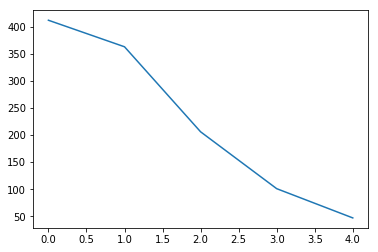

Real Percentage of gain: -20.923972287654454
Percentage of gain: -0.013578676932863055
Total gain: -15.343904934135253
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 96 136]
 [ 81  98]]
0.4720194647201946
Percentile:  1
[[ 48  63]
 [ 98 154]]
0.5564738292011019
Percentile:  2
[[50 47]
 [74 35]]
0.41262135922330095
Percentile:  3
[[ 1 13]
 [55 32]]
0.32673267326732675
Percentile:  4
[[ 0  0]
 [ 8 39]]
0.8297872340425532
000000000000000000000000000000000000000000000000
Working on... MSFT
40
29
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.5965909090909091
G-score: 0.4474319631752361
Accuracy 0.49734513274336284
Window: 140
[[142 277]
 [291 420]]
Vol pos 1.4822725272624486
Vol neg 1.6669670654587325


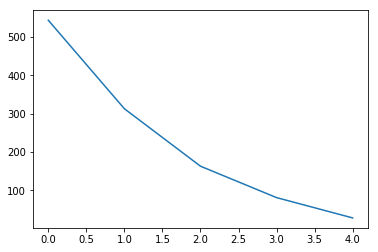

Real Percentage of gain: 4.9992782929585555
Percentage of gain: -0.10070808217616281
Total gain: -113.80013285906398
000000000000000000000000000000000000000000000000
Percentile:  0
[[104 188]
 [ 79 173]]
0.5091911764705882
Percentile:  1
[[ 27  47]
 [103 136]]
0.5207667731629393
Percentile:  2
[[ 8 15]
 [61 79]]
0.5337423312883436
Percentile:  3
[[ 2 18]
 [40 21]]
0.2839506172839506
Percentile:  4
[[ 1  9]
 [ 8 10]]
0.39285714285714285
000000000000000000000000000000000000000000000000
Working on... FB
40
28
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.7465214761040532
G-score: 0.5090851584438327
Accuracy 0.6298586572438163
Window: 140
[[ 96 167]
 [252 617]]
Vol pos 3.2556957379777054
Vol neg 2.7747282539399056


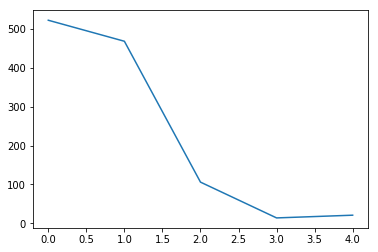

Real Percentage of gain: 115.14621922274088
Percentage of gain: 1.023586504220215
Total gain: 1158.6999227772835
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 56 156]
 [ 84 226]]
0.5402298850574713
Percentile:  1
[[ 26  11]
 [112 319]]
0.7371794871794872
Percentile:  2
[[13  0]
 [43 49]]
0.5904761904761905
Percentile:  3
[[0 0]
 [7 7]]
0.5
Percentile:  4
[[ 0  0]
 [ 5 16]]
0.7619047619047619
000000000000000000000000000000000000000000000000
Working on... INTC
40
28
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.6084608460846084
G-score: 0.6292721574993152
Accuracy 0.6157243816254417
Window: 140
[[359  89]
 [346 338]]
Vol pos 2.509845277021603
Vol neg 2.0428160765274237


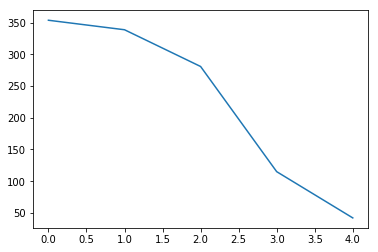

Real Percentage of gain: 105.19839577414814
Percentage of gain: 0.7603685201365971
Total gain: 860.7371647946279
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 91  25]
 [139  99]]
0.536723163841808
Percentile:  1
[[ 91  23]
 [110 118]]
0.6111111111111112
Percentile:  2
[[97 30]
 [72 79]]
0.6330935251798561
Percentile:  3
[[56  7]
 [16 35]]
0.7982456140350878
Percentile:  4
[[24  4]
 [ 8  6]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... CSCO
40
28
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.43444227005870845
G-score: 0.48313830936935437
Accuracy 0.4862222222222222
Window: 140
[[325 152]
 [426 222]]
Vol pos 2.053458064990339
Vol neg 1.641132274431017


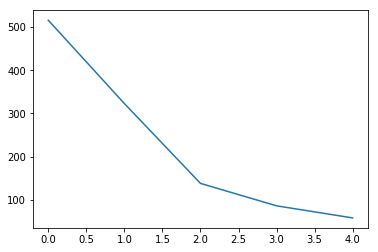

Real Percentage of gain: 36.67213630076695
Percentage of gain: 0.15525965060318897
Total gain: 174.6671069285876
000000000000000000000000000000000000000000000000
Percentile:  0
[[165  55]
 [218  78]]
0.47093023255813954
Percentile:  1
[[ 60  36]
 [139  88]]
0.4582043343653251
Percentile:  2
[[ 7 43]
 [51 37]]
0.3188405797101449
Percentile:  3
[[40 18]
 [ 9 19]]
0.686046511627907
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
40
28
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.4114832535885167
G-score: 0.4506765573660997
Accuracy 0.45671378091872794
Window: 140
[[302 238]
 [377 215]]
Vol pos 2.74547089438537
Vol neg 2.9506563899506446


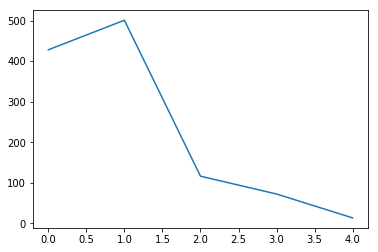

Real Percentage of gain: -82.96720839925197
Percentage of gain: -0.34915656132721745
Total gain: -395.24522742241015
000000000000000000000000000000000000000000000000
Percentile:  0
[[130  97]
 [102  99]]
0.5350467289719626
Percentile:  1
[[102  95]
 [214  90]]
0.38323353293413176
Percentile:  2
[[29 13]
 [51 23]]
0.4482758620689655
Percentile:  3
[[33 27]
 [ 9  3]]
0.5
Percentile:  4
[[8 5]
 [0 0]]
0.6153846153846154
000000000000000000000000000000000000000000000000
Working on... NVDA
40
28
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.73855702094647
G-score: 0.697338144521636
Accuracy 0.7022968197879859
Window: 140
[[319 157]
 [180 476]]
Vol pos 4.0526973277122025
Vol neg 3.1023024758926474


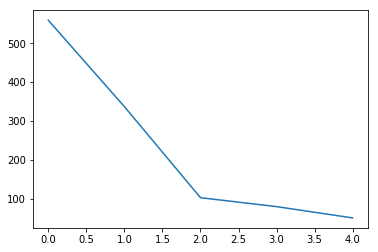

Real Percentage of gain: 440.73363855719913
Percentage of gain: 1.922631131762702
Total gain: 2176.418441155379
000000000000000000000000000000000000000000000000
Percentile:  0
[[212 101]
 [ 98 148]]
0.6440071556350626
Percentile:  1
[[ 76  41]
 [ 51 169]]
0.7270029673590505
Percentile:  2
[[24  7]
 [ 3 69]]
0.9029126213592233
Percentile:  3
[[ 7  8]
 [14 51]]
0.725
Percentile:  4
[[ 0  0]
 [13 38]]
0.7450980392156863
000000000000000000000000000000000000000000000000
Working on... NFLX
40
29
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.7444444444444445
G-score: 0.528793506990911
Accuracy 0.6342756183745583
Window: 140
[[115 182]
 [232 603]]
Vol pos 4.490664046562821
Vol neg 4.069586252012714


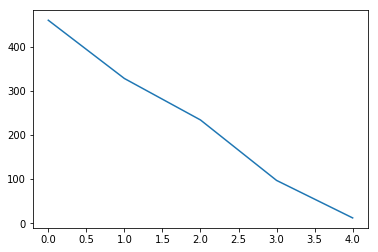

Real Percentage of gain: 159.21555899247798
Percentage of gain: 1.3599717995572806
Total gain: 1539.4880770988418
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 75  95]
 [ 71 219]]
0.6391304347826087
Percentile:  1
[[  6  54]
 [ 80 188]]
0.5914634146341463
Percentile:  2
[[ 10  28]
 [ 70 125]]
0.5793991416309013
Percentile:  3
[[22  5]
 [11 59]]
0.8350515463917526
Percentile:  4
[[ 1  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
40
21
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7358184764991896
G-score: 0.2278592395167158
Accuracy 0.5904522613065326
Window: 140
[[  8 123]
 [ 40 227]]
Vol pos 1.446322938481127
Vol neg 0.7984970000491524


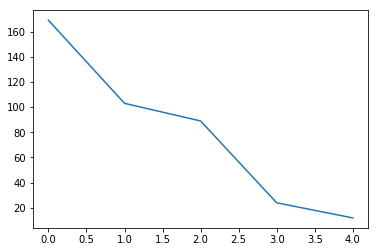

Real Percentage of gain: 191.41204727866574
Percentage of gain: 0.5269620088820427
Total gain: 209.730879535053
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 7 90]
 [18 57]]
0.37209302325581395
Percentile:  1
[[ 0 26]
 [ 6 68]]
0.68
Percentile:  2
[[ 0  7]
 [12 70]]
0.7865168539325843
Percentile:  3
[[ 0  0]
 [ 4 19]]
0.8260869565217391
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
40
27
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.2603342128408091
G-score: 0.2684540181468773
Accuracy 0.2550930026572188
Window: 140
[[140 248]
 [593 148]]
Vol pos 1.7393827491182816
Vol neg 2.899276825192117


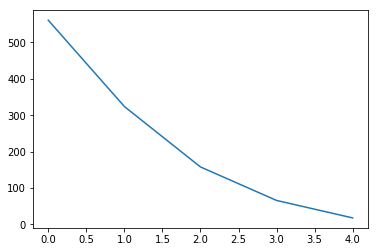

Real Percentage of gain: -269.7377868803165
Percentage of gain: -1.715987226076621
Total gain: -1937.3495782405053
000000000000000000000000000000000000000000000000
Percentile:  0
[[122 155]
 [217  67]]
0.33689839572192515
Percentile:  1
[[ 18  45]
 [207  54]]
0.2222222222222222
Percentile:  2
[[  0  25]
 [106  27]]
0.17088607594936708
Percentile:  3
[[ 0 23]
 [43  0]]
0.0
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
40
27
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7241139680333565
G-score: 0.6447079570919949
Accuracy 0.6464826357969724
Window: 140
[[205 115]
 [282 521]]
Vol pos 2.107901392916832
Vol neg 1.6081945700609348


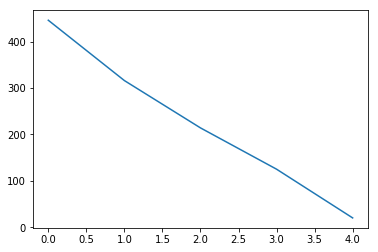

Real Percentage of gain: 226.70079607968574
Percentage of gain: 0.7941969429594202
Total gain: 891.8831669434289
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 95  70]
 [131 150]]
0.5493273542600897
Percentile:  1
[[ 36  19]
 [ 83 178]]
0.6772151898734177
Percentile:  2
[[ 20   6]
 [ 53 135]]
0.7242990654205608
Percentile:  3
[[40 16]
 [15 54]]
0.752
Percentile:  4
[[13  4]
 [ 0  3]]
0.8
000000000000000000000000000000000000000000000000
Working on... TXN
40
24
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.6508795669824087
G-score: 0.4791138871038628
Accuracy 0.5437665782493368
Window: 140
[[134 234]
 [282 481]]
Vol pos 2.7083192280252995
Vol neg 2.2426038328016418


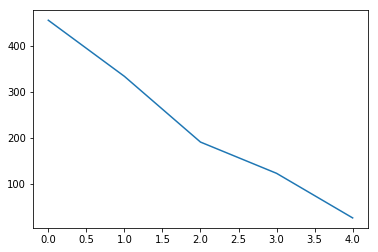

Real Percentage of gain: 8.164699846074928
Percentage of gain: 0.4495426591599575
Total gain: 508.43274750991185
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76 132]
 [ 82 165]]
0.5296703296703297
Percentile:  1
[[ 58  71]
 [103 102]]
0.47904191616766467
Percentile:  2
[[  0  14]
 [ 75 103]]
0.5364583333333334
Percentile:  3
[[ 0 10]
 [22 90]]
0.7377049180327869
Percentile:  4
[[ 0  7]
 [ 0 19]]
0.7307692307692307
000000000000000000000000000000000000000000000000
Working on... AVGO
40
28
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.5053435114503818
G-score: 0.4090856122772049
Accuracy 0.42502218278615794
Window: 140
[[148 258]
 [390 331]]
Vol pos 3.3375371706191967
Vol neg 3.101686476724022


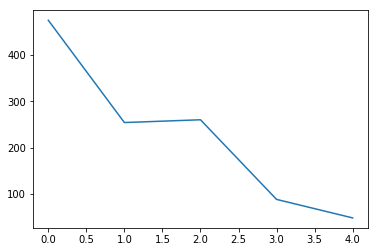

Real Percentage of gain: -8.647751838309194
Percentage of gain: -0.36487358668196185
Total gain: -411.212532190571
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 69 132]
 [146 128]]
0.4147368421052632
Percentile:  1
[[30 74]
 [71 79]]
0.42913385826771655
Percentile:  2
[[ 16  22]
 [135  87]]
0.39615384615384613
Percentile:  3
[[11 14]
 [38 25]]
0.4090909090909091
Percentile:  4
[[21 16]
 [ 0 11]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PYPL
40
27
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5957152729785763
G-score: 0.4345641239992308
Accuracy 0.4818423383525244
Window: 140
[[113 205]
 [380 431]]
Vol pos 2.5228517891715616
Vol neg 3.2698073471415117


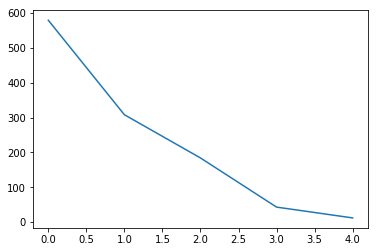

Real Percentage of gain: -26.61905250205087
Percentage of gain: -0.47865892362130624
Total gain: -540.4059247684547
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 56  78]
 [193 252]]
0.531951640759931
Percentile:  1
[[ 16  35]
 [114 143]]
0.5162337662337663
Percentile:  2
[[41 79]
 [41 23]]
0.34782608695652173
Percentile:  3
[[ 0 13]
 [25  5]]
0.11627906976744186
Percentile:  4
[[0 0]
 [6 6]]
0.5
000000000000000000000000000000000000000000000000
Working on... GILD
40
27
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.4383233532934131
G-score: 0.5235657245613973
Accuracy 0.5842198581560284
Window: 140
[[476 106]
 [363 183]]
Vol pos 3.311084319565741
Vol neg 3.1374083723329216


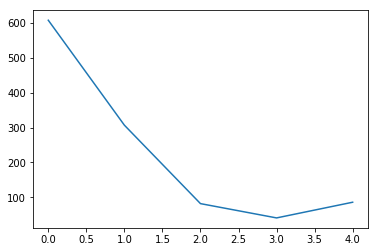

Real Percentage of gain: 184.85194648204634
Percentage of gain: 0.6299291134483005
Total gain: 710.560039969683
000000000000000000000000000000000000000000000000
Percentile:  0
[[310  29]
 [189  80]]
0.6414473684210527
Percentile:  1
[[ 61  42]
 [124  80]]
0.4592833876221498
Percentile:  2
[[ 7  5]
 [47 23]]
0.36585365853658536
Percentile:  3
[[26 15]
 [ 0  0]]
0.6341463414634146
Percentile:  4
[[71 15]
 [ 0  0]]
0.8255813953488372
000000000000000000000000000000000000000000000000
Working on... COST
40
28
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.6068866571018652
G-score: 0.4806181478467352
Accuracy 0.5137533274179237
Window: 140
[[156 229]
 [319 423]]
Vol pos 1.48232460765736
Vol neg 1.2877733056241807


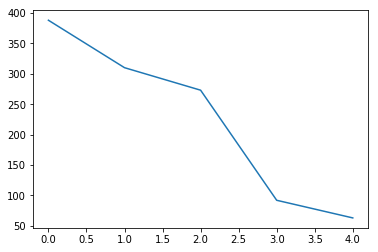

Real Percentage of gain: 58.43590134951223
Percentage of gain: 0.1353737145976579
Total gain: 152.56617635156044
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 66 134]
 [ 74 113]]
0.4625322997416021
Percentile:  1
[[ 38  66]
 [ 92 114]]
0.49032258064516127
Percentile:  2
[[ 42  26]
 [100 105]]
0.5384615384615384
Percentile:  3
[[ 9  3]
 [22 58]]
0.7282608695652174
Percentile:  4
[[ 0  0]
 [30 33]]
0.5238095238095238
000000000000000000000000000000000000000000000000
Working on... QCOM
40
28
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.5105008077544426
G-score: 0.4896340899444395
Accuracy 0.46419098143236076
Window: 140
[[209 146]
 [460 316]]
Vol pos 3.320858534203844
Vol neg 3.3785620383598385


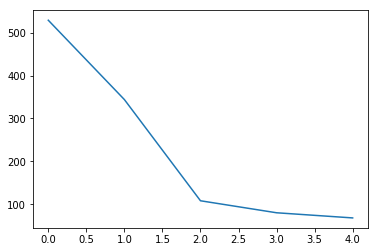

Real Percentage of gain: 17.536477135980704
Percentage of gain: -0.2687514277533545
Total gain: -303.9578647890439
000000000000000000000000000000000000000000000000
Percentile:  0
[[133  97]
 [154 145]]
0.5255198487712666
Percentile:  1
[[ 20  28]
 [194 102]]
0.3546511627906977
Percentile:  2
[[14  4]
 [55 35]]
0.4537037037037037
Percentile:  3
[[11  1]
 [37 31]]
0.525
Percentile:  4
[[31 15]
 [19  3]]
0.5
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.525280871724073
Mean gain over portfolio :  202.6992764448543
Real mean gain over portfolio 59.199330394292666


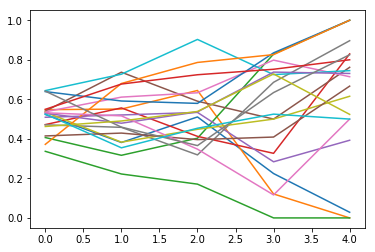

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(senttemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    senttemp=scaler.transform(senttemp)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        rf = RandomForestClassifier()
        rf.fit(x, y)
        
       
        
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        
        treshold=0.8
        optimum=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimum=order[0:u]
                break
        
        print(len(x[0]))
        
        x=x[:,optimum]
        
        print(len(x[0]))
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

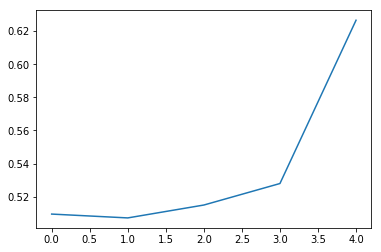

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
40
24
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.5871999999999999
G-score: 0.535813874926639
Accuracy 0.5433628318584071
Window: 140
[[247 259]
 [257 367]]
Vol pos 3.142777471513952
Vol neg 3.21138188874516


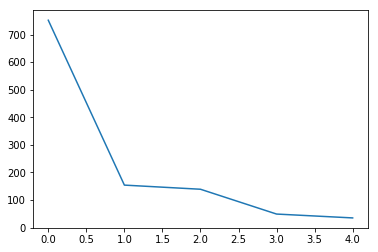

Real Percentage of gain: 50.37745270162007
Percentage of gain: 0.24123213532483537
Total gain: 272.59231291706396
000000000000000000000000000000000000000000000000
Percentile:  0
[[182 196]
 [144 231]]
0.548472775564409
Percentile:  1
[[40 28]
 [51 33]]
0.48026315789473684
Percentile:  2
[[25 35]
 [21 58]]
0.5971223021582733
Percentile:  3
[[ 0  0]
 [27 22]]
0.4489795918367347
Percentile:  4
[[ 0  0]
 [14 21]]
0.6
000000000000000000000000000000000000000000000000
Working on... AMZN
40
24
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.6525759577278732
G-score: 0.5002045879785628
Accuracy 0.5353356890459364
Window: 140
[[112 139]
 [387 494]]
Vol pos 2.251819439893198
Vol neg 2.4909660236209286


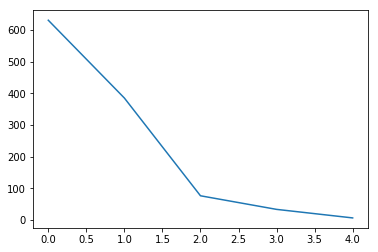

Real Percentage of gain: 57.669971291585085
Percentage of gain: 0.048016300486457296
Total gain: 54.35445215066966
000000000000000000000000000000000000000000000000
Percentile:  0
[[105  94]
 [193 238]]
0.5444444444444444
Percentile:  1
[[  1  35]
 [147 202]]
0.5272727272727272
Percentile:  2
[[ 6 10]
 [ 9 51]]
0.75
Percentile:  3
[[ 0  0]
 [31  2]]
0.06060606060606061
Percentile:  4
[[0 0]
 [6 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PEP
40
20
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.6007237635705669
G-score: 0.5889984314718462
Accuracy 0.4915514592933948
Window: 140
[[ 71  20]
 [311 249]]
Vol pos 1.7305285423684442
Vol neg 2.4225460692232392


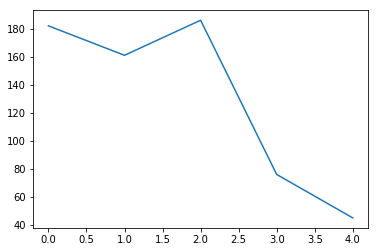

Real Percentage of gain: 7.110278825180515
Percentage of gain: -0.38109618334099843
Total gain: -248.09361535499
000000000000000000000000000000000000000000000000
Percentile:  0
[[52 20]
 [44 66]]
0.6483516483516484
Percentile:  1
[[19  0]
 [78 64]]
0.515527950310559
Percentile:  2
[[  0   0]
 [103  83]]
0.44623655913978494
Percentile:  3
[[ 0  0]
 [51 25]]
0.32894736842105265
Percentile:  4
[[ 0  0]
 [35 10]]
0.2222222222222222
000000000000000000000000000000000000000000000000
Working on... GOOGL
40
24
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.3922942206654991
G-score: 0.3932188736837064
Accuracy 0.3858407079646018
Window: 140
[[212 243]
 [451 224]]
Vol pos 2.4285317945043547
Vol neg 3.286225396361007


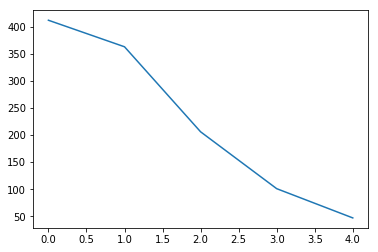

Real Percentage of gain: -91.76754636359425
Percentage of gain: -1.0812394359917172
Total gain: -1221.8005626706404
000000000000000000000000000000000000000000000000
Percentile:  0
[[121 111]
 [110  69]]
0.46228710462287104
Percentile:  1
[[ 34  77]
 [140 112]]
0.4022038567493113
Percentile:  2
[[55 42]
 [90 19]]
0.3592233009708738
Percentile:  3
[[ 1 13]
 [66 21]]
0.21782178217821782
Percentile:  4
[[ 0  0]
 [44  3]]
0.06382978723404255
000000000000000000000000000000000000000000000000
Working on... MSFT
40
24
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.49432739059967584
G-score: 0.45363456293288607
Accuracy 0.44778761061946903
Window: 140
[[201 218]
 [406 305]]
Vol pos 1.3697543154926832
Vol neg 1.7416326440108298


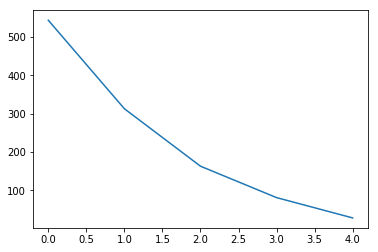

Real Percentage of gain: -0.46935468496811766
Percentage of gain: -0.3483921117021771
Total gain: -393.6830862234601
000000000000000000000000000000000000000000000000
Percentile:  0
[[153 139]
 [113 139]]
0.5367647058823529
Percentile:  1
[[ 33  41]
 [152  87]]
0.38338658146964855
Percentile:  2
[[ 9 14]
 [92 48]]
0.3496932515337423
Percentile:  3
[[ 4 16]
 [45 16]]
0.24691358024691357
Percentile:  4
[[ 2  8]
 [ 4 14]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... FB
40
24
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.8324265505984766
G-score: 0.4443947922674362
Accuracy 0.7279151943462897
Window: 140
[[ 59 204]
 [104 765]]
Vol pos 3.357395523320995
Vol neg 2.3293126245533253


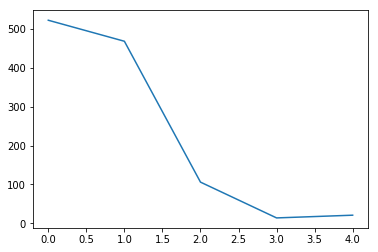

Real Percentage of gain: 184.68591176208616
Percentage of gain: 1.81012864209724
Total gain: 2049.0656228540756
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 38 174]
 [ 26 284]]
0.6168582375478927
Percentile:  1
[[  8  29]
 [ 65 366]]
0.7991452991452992
Percentile:  2
[[13  0]
 [ 5 87]]
0.9523809523809523
Percentile:  3
[[ 0  0]
 [ 4 10]]
0.7142857142857143
Percentile:  4
[[ 0  0]
 [ 3 18]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... INTC
40
24
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.5739592559787422
G-score: 0.5880027044590252
Accuracy 0.5750883392226148
Window: 140
[[327 121]
 [360 324]]
Vol pos 2.4867435996220957
Vol neg 2.118746503159051


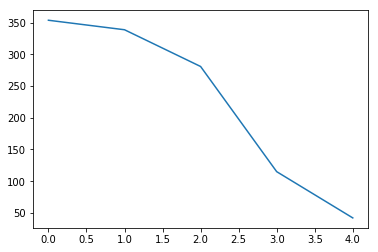

Real Percentage of gain: 57.5820858136139
Percentage of gain: 0.5298171513555482
Total gain: 599.7530153344806
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 82  34]
 [152  86]]
0.4745762711864407
Percentile:  1
[[ 89  25]
 [111 117]]
0.6023391812865497
Percentile:  2
[[92 35]
 [66 85]]
0.6366906474820144
Percentile:  3
[[46 17]
 [25 26]]
0.631578947368421
Percentile:  4
[[18 10]
 [ 5  9]]
0.6428571428571429
000000000000000000000000000000000000000000000000
Working on... CSCO
40
23
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.4923076923076923
G-score: 0.5069080466784426
Accuracy 0.5013333333333333
Window: 140
[[292 185]
 [376 272]]
Vol pos 2.047293003946086
Vol neg 1.6348355827901089


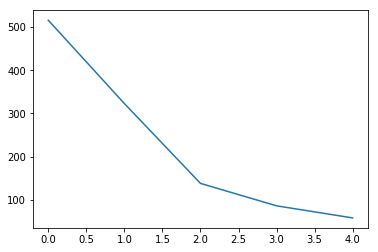

Real Percentage of gain: 36.20501697472651
Percentage of gain: 0.21113821536030344
Total gain: 237.53049228034138
000000000000000000000000000000000000000000000000
Percentile:  0
[[144  76]
 [195 101]]
0.4748062015503876
Percentile:  1
[[ 52  44]
 [117 110]]
0.5015479876160991
Percentile:  2
[[ 6 44]
 [46 42]]
0.34782608695652173
Percentile:  3
[[37 21]
 [ 9 19]]
0.6511627906976745
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
40
24
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.5348432055749129
G-score: 0.5286374774669145
Accuracy 0.5282685512367491
Window: 140
[[291 249]
 [285 307]]
Vol pos 2.8608723032247463
Vol neg 2.852547743236863


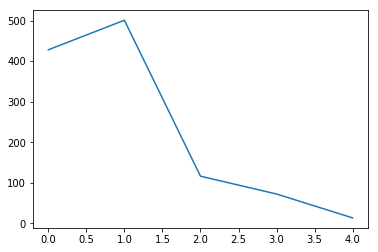

Real Percentage of gain: 5.1102641545615475
Percentage of gain: 0.16567238731441125
Total gain: 187.54114243991353
000000000000000000000000000000000000000000000000
Percentile:  0
[[118 109]
 [ 94 107]]
0.5257009345794392
Percentile:  1
[[106  91]
 [145 159]]
0.5289421157684631
Percentile:  2
[[25 17]
 [34 40]]
0.5603448275862069
Percentile:  3
[[34 26]
 [11  1]]
0.4861111111111111
Percentile:  4
[[7 6]
 [0 0]]
0.5384615384615384
000000000000000000000000000000000000000000000000
Working on... NVDA
40
23
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.7097701149425288
G-score: 0.6084375475193817
Accuracy 0.6431095406360424
Window: 140
[[234 242]
 [162 494]]
Vol pos 4.275115035697189
Vol neg 2.859125158216508


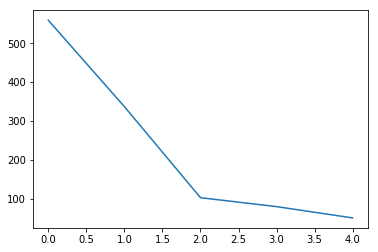

Real Percentage of gain: 270.89338612881323
Percentage of gain: 1.7289727756785198
Total gain: 1957.1971820680847
000000000000000000000000000000000000000000000000
Percentile:  0
[[150 163]
 [ 63 183]]
0.5957066189624329
Percentile:  1
[[ 64  53]
 [ 78 142]]
0.6112759643916914
Percentile:  2
[[16 15]
 [14 58]]
0.7184466019417476
Percentile:  3
[[ 4 11]
 [ 3 62]]
0.825
Percentile:  4
[[ 0  0]
 [ 4 47]]
0.9215686274509803
000000000000000000000000000000000000000000000000
Working on... NFLX
40
25
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.7226784586228681
G-score: 0.5282861647825382
Accuracy 0.6121908127208481
Window: 140
[[121 176]
 [263 572]]
Vol pos 4.549371364822303
Vol neg 4.00089097481438


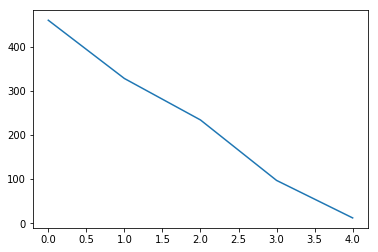

Real Percentage of gain: 126.0143551572678
Percentage of gain: 1.2335010758642606
Total gain: 1396.323217878343
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 77  93]
 [ 86 204]]
0.6108695652173913
Percentile:  1
[[  7  53]
 [ 90 178]]
0.5640243902439024
Percentile:  2
[[ 11  27]
 [ 74 121]]
0.5665236051502146
Percentile:  3
[[24  3]
 [13 57]]
0.8350515463917526
Percentile:  4
[[ 1  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
40
17
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7541528239202658
G-score: 0.38635413802658586
Accuracy 0.628140703517588
Window: 140
[[ 23 108]
 [ 40 227]]
Vol pos 1.5113892866018561
Vol neg 0.6229295939230578


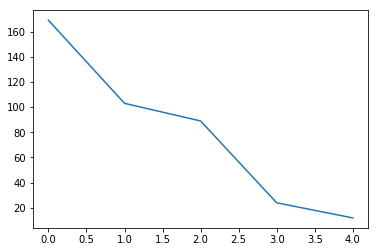

Real Percentage of gain: 202.32946917434563
Percentage of gain: 0.7177229692207323
Total gain: 285.65374174985146
000000000000000000000000000000000000000000000000
Percentile:  0
[[10 87]
 [24 51]]
0.3546511627906977
Percentile:  1
[[11 15]
 [11 63]]
0.74
Percentile:  2
[[ 1  6]
 [ 2 80]]
0.9101123595505618
Percentile:  3
[[ 0  0]
 [ 3 20]]
0.8695652173913043
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
40
23
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.27695167286245354
G-score: 0.3235518237570028
Accuracy 0.31089459698848537
Window: 140
[[202 186]
 [592 149]]
Vol pos 1.9046449777108239
Vol neg 2.9186422295065984


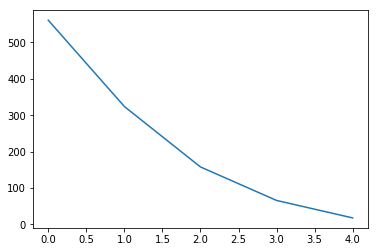

Real Percentage of gain: -236.9942365287487
Percentage of gain: -1.419108297059021
Total gain: -1602.1732673796346
000000000000000000000000000000000000000000000000
Percentile:  0
[[154 123]
 [213  71]]
0.40106951871657753
Percentile:  1
[[ 33  30]
 [212  49]]
0.25308641975308643
Percentile:  2
[[  6  19]
 [104  29]]
0.22151898734177214
Percentile:  3
[[ 9 14]
 [43  0]]
0.13636363636363635
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
40
23
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7814910025706939
G-score: 0.6434844435887493
Accuracy 0.697239536954586
Window: 140
[[175 145]
 [195 608]]
Vol pos 2.1347476644650363
Vol neg 1.4625948067520202


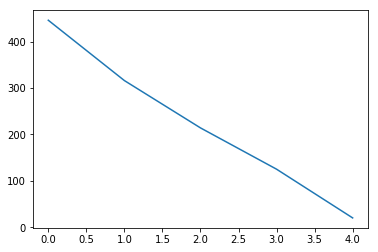

Real Percentage of gain: 223.25583356464992
Percentage of gain: 1.045614592146426
Total gain: 1174.2251869804363
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 65 100]
 [102 179]]
0.547085201793722
Percentile:  1
[[ 36  19]
 [ 54 207]]
0.7689873417721519
Percentile:  2
[[ 21   5]
 [ 18 170]]
0.8925233644859814
Percentile:  3
[[39 17]
 [20 49]]
0.704
Percentile:  4
[[13  4]
 [ 1  2]]
0.75
000000000000000000000000000000000000000000000000
Working on... TXN
40
20
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.7047113470471136
G-score: 0.5414108206128999
Accuracy 0.6065428824049514
Window: 140
[[155 213]
 [232 531]]
Vol pos 2.6884995683008226
Vol neg 2.198852132824365


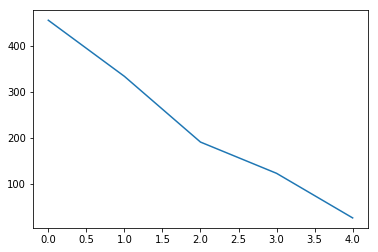

Real Percentage of gain: 107.8579735639767
Percentage of gain: 0.7655362553028486
Total gain: 865.8215047475218
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 90 118]
 [ 85 162]]
0.5538461538461539
Percentile:  1
[[ 65  64]
 [ 68 137]]
0.6047904191616766
Percentile:  2
[[  0  14]
 [ 60 118]]
0.6145833333333334
Percentile:  3
[[ 0 10]
 [17 95]]
0.7786885245901639
Percentile:  4
[[ 0  7]
 [ 1 18]]
0.6923076923076923
000000000000000000000000000000000000000000000000
Working on... AVGO
40
24
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.5604229607250756
G-score: 0.46960307257274647
Accuracy 0.4835847382431233
Window: 140
[[174 232]
 [350 371]]
Vol pos 3.693584045241528
Vol neg 2.7415289295311474


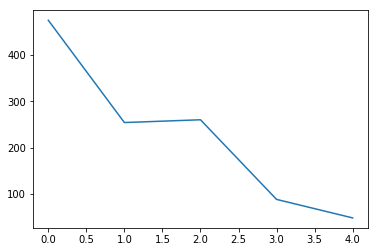

Real Percentage of gain: 13.059131273355504
Percentage of gain: 0.3703934939392236
Total gain: 417.43346766950503
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67 134]
 [150 124]]
0.40210526315789474
Percentile:  1
[[35 69]
 [55 95]]
0.5118110236220472
Percentile:  2
[[ 16  22]
 [113 109]]
0.4807692307692308
Percentile:  3
[[21  4]
 [32 31]]
0.5909090909090909
Percentile:  4
[[34  3]
 [ 0 11]]
0.9375
000000000000000000000000000000000000000000000000
Working on... PYPL
40
23
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5594713656387665
G-score: 0.46759446148934775
Accuracy 0.4685562444641275
Window: 140
[[148 170]
 [430 381]]
Vol pos 2.5870306607891878
Vol neg 3.1945490863827244


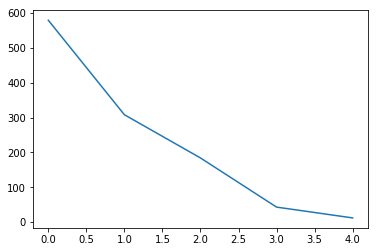

Real Percentage of gain: -43.27642193054417
Percentage of gain: -0.4855537929779933
Total gain: -548.1902322721544
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76  58]
 [221 224]]
0.5181347150259067
Percentile:  1
[[ 24  27]
 [130 127]]
0.4902597402597403
Percentile:  2
[[43 77]
 [48 16]]
0.32065217391304346
Percentile:  3
[[ 5  8]
 [23  7]]
0.27906976744186046
Percentile:  4
[[0 0]
 [6 6]]
0.5
000000000000000000000000000000000000000000000000
Working on... GILD
40
23
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.57917760279965
G-score: 0.573719649629269
Accuracy 0.5735815602836879
Window: 140
[[316 266]
 [215 331]]
Vol pos 3.1132179283822268
Vol neg 3.407894165394311


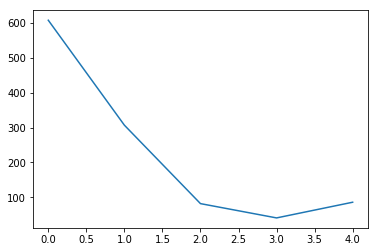

Real Percentage of gain: 32.28088683755049
Percentage of gain: 0.33249548413886276
Total gain: 375.05490610863717
000000000000000000000000000000000000000000000000
Percentile:  0
[[205 134]
 [126 143]]
0.5723684210526315
Percentile:  1
[[ 46  57]
 [ 56 148]]
0.6319218241042345
Percentile:  2
[[ 1 11]
 [32 38]]
0.47560975609756095
Percentile:  3
[[12 29]
 [ 0  0]]
0.2926829268292683
Percentile:  4
[[52 34]
 [ 0  0]]
0.6046511627906976
000000000000000000000000000000000000000000000000
Working on... COST
40
24
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.5762217359591539
G-score: 0.4569352934811191
Accuracy 0.484472049689441
Window: 140
[[151 234]
 [347 395]]
Vol pos 1.50264709203006
Vol neg 1.2797253133687612


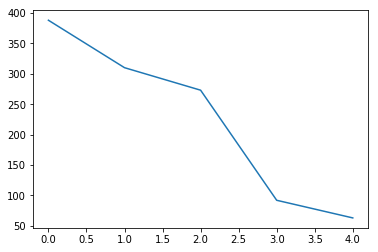

Real Percentage of gain: 31.78882232482421
Percentage of gain: 0.06825634887414601
Total gain: 76.92490518116256
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 66 134]
 [ 93  94]]
0.4134366925064599
Percentile:  1
[[ 40  64]
 [104 102]]
0.45806451612903226
Percentile:  2
[[ 35  33]
 [ 92 113]]
0.5421245421245421
Percentile:  3
[[ 9  3]
 [22 58]]
0.7282608695652174
Percentile:  4
[[ 0  0]
 [35 28]]
0.4444444444444444
000000000000000000000000000000000000000000000000
Working on... QCOM
40
24
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.4446322907861369
G-score: 0.44882192565929674
Accuracy 0.41909814323607425
Window: 140
[[211 144]
 [513 263]]
Vol pos 3.6956516059723037
Vol neg 3.103684116396056


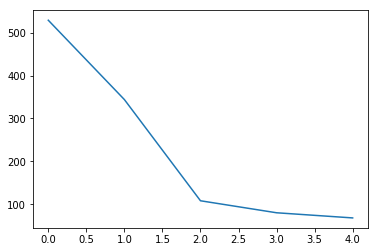

Real Percentage of gain: -48.18464199759316
Percentage of gain: -0.25409513991276456
Total gain: -287.38160324133673
000000000000000000000000000000000000000000000000
Percentile:  0
[[120 110]
 [183 116]]
0.44612476370510395
Percentile:  1
[[ 26  22]
 [238  58]]
0.2441860465116279
Percentile:  2
[[15  3]
 [39 51]]
0.6111111111111112
Percentile:  3
[[12  0]
 [31 37]]
0.6125
Percentile:  4
[[38  8]
 [21  1]]
0.5735294117647058
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5331947263029876
Mean gain over portfolio :  282.40743916089343
Real mean gain over portfolio 49.27643190213545


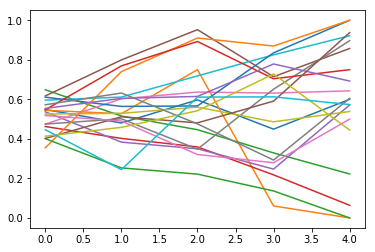

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(senttemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    senttemp=scaler.transform(senttemp)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        rf = RandomForestClassifier()
        rf.fit(x, y)
        
       
        
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        
        treshold=0.7
        optimum=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimum=order[0:u]
                break
        
        print(len(x[0]))
        
        x=x[:,optimum]
        
        print(len(x[0]))
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

[0. 0. 0. 0.]


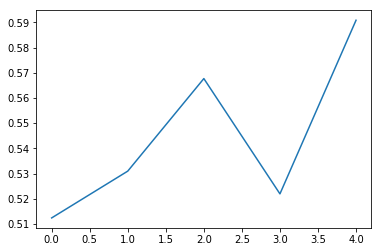

In [8]:
tot=np.zeros(5)
print(tot[0:4])
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()